##1. Exploring Activation Functions in Neural Networks

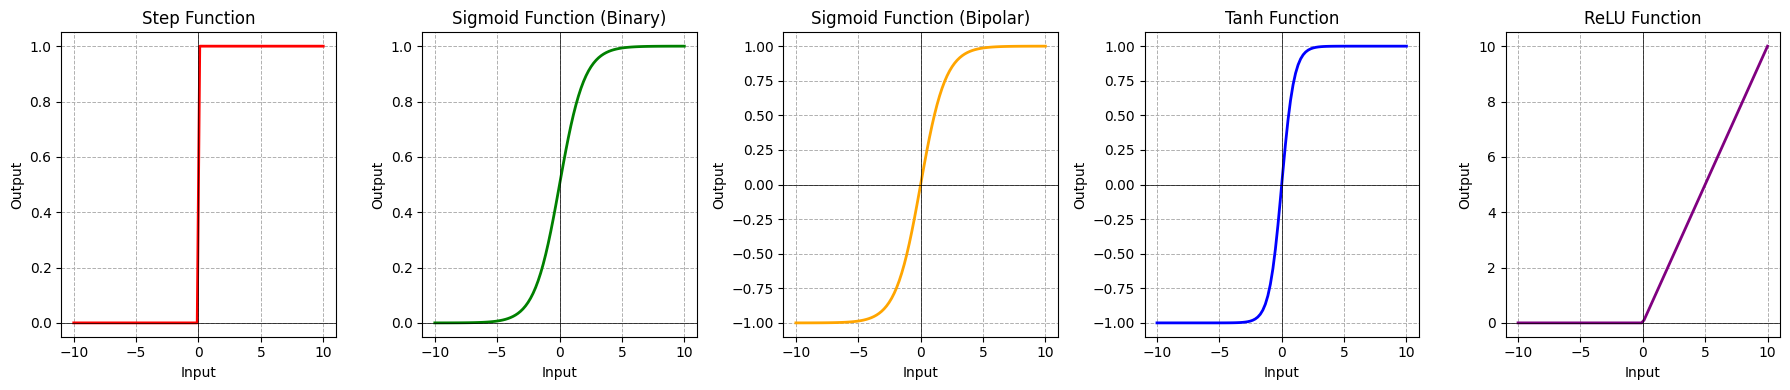

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step Function
def step_function(x):
    return np.where(x >= 0, 1, 0)

# Binary Sigmoid Function
def sigmoid_binary(x):
    return 1 / (1 + np.exp(-x))

# Bipolar Sigmoid Function
def sigmoid_bipolar(x):
    return (1 - np.exp(-x)) / (1 + np.exp(-x))

# Tanh Function
def tanh_function(x):
    return np.tanh(x)

# ReLU Function
def relu_function(x):
    return np.maximum(0, x)

# Main block to visualize the activation functions
if __name__ == "__main__":
    # Input range for visualization
    x_values = np.linspace(-10, 10, 100)

    # Create a figure with 5 subplots (1 row, 5 columns)
    fig, axs = plt.subplots(1, 5, figsize=(18, 4))  # 5 subplots in a row

    # Step Function
    axs[0].plot(x_values, step_function(x_values), color='r', linewidth=2)
    axs[0].set_title('Step Function')
    axs[0].grid(True, linestyle='--', linewidth=0.7)

    # Sigmoid (Binary) Function
    axs[1].plot(x_values, sigmoid_binary(x_values), color='g', linewidth=2)
    axs[1].set_title('Sigmoid Function (Binary)')
    axs[1].grid(True, linestyle='--', linewidth=0.7)

    # Sigmoid (Bipolar) Function
    axs[2].plot(x_values, sigmoid_bipolar(x_values), color='orange', linewidth=2)
    axs[2].set_title('Sigmoid Function (Bipolar)')
    axs[2].grid(True, linestyle='--', linewidth=0.7)

    # Tanh Function
    axs[3].plot(x_values, tanh_function(x_values), color='b', linewidth=2)
    axs[3].set_title('Tanh Function')
    axs[3].grid(True, linestyle='--', linewidth=0.7)

    # ReLU Function
    axs[4].plot(x_values, relu_function(x_values), color='purple', linewidth=2)
    axs[4].set_title('ReLU Function')
    axs[4].grid(True, linestyle='--', linewidth=0.7)

    # Formatting each plot
    for ax in axs:
        ax.axhline(0, color='black', linewidth=0.5)
        ax.axvline(0, color='black', linewidth=0.5)
        ax.set_xlabel('Input')
        ax.set_ylabel('Output')

    plt.tight_layout()  # Adjust spacing
    plt.show()


##2. Implement a Simple Neural Network:

<ipython-input-11-8995180299a9>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age'].fillna(X['age'].mean(), inplace=True)
<ipython-input-11-8995180299a9>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['embarked'].fillna(X['embarked'].mode()[0], inplace=True)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training with sigmoid activation function:


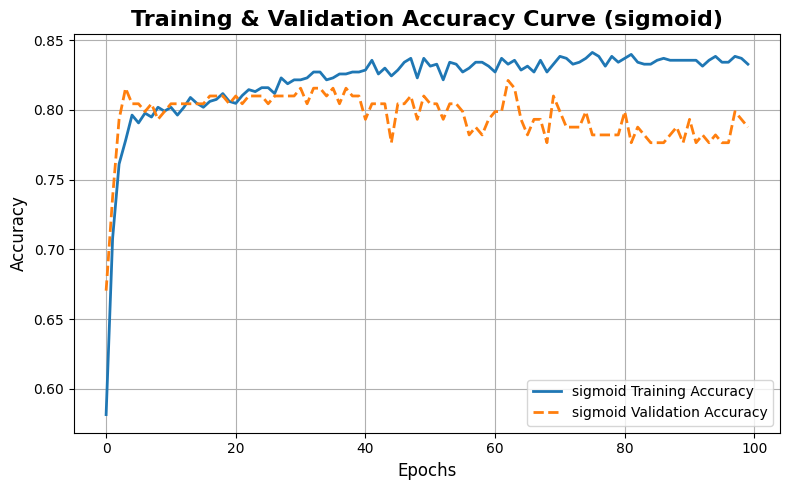

Final Test Accuracy with sigmoid: 0.7877

Training with tanh activation function:


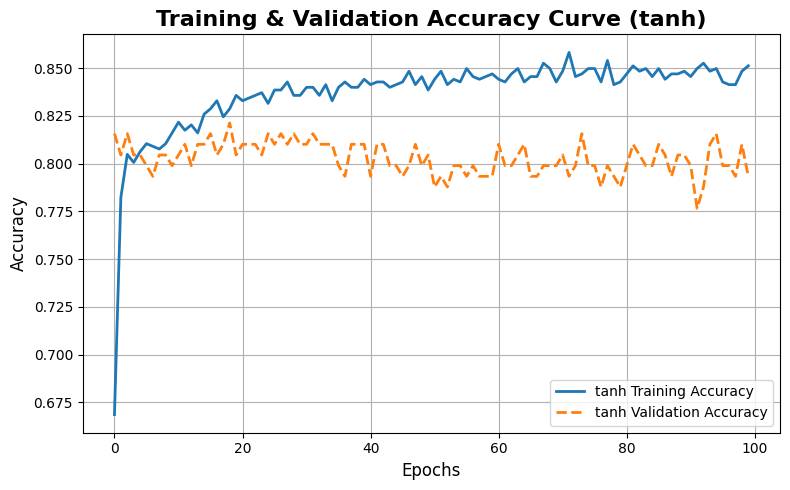

Final Test Accuracy with tanh: 0.7933

Training with relu activation function:


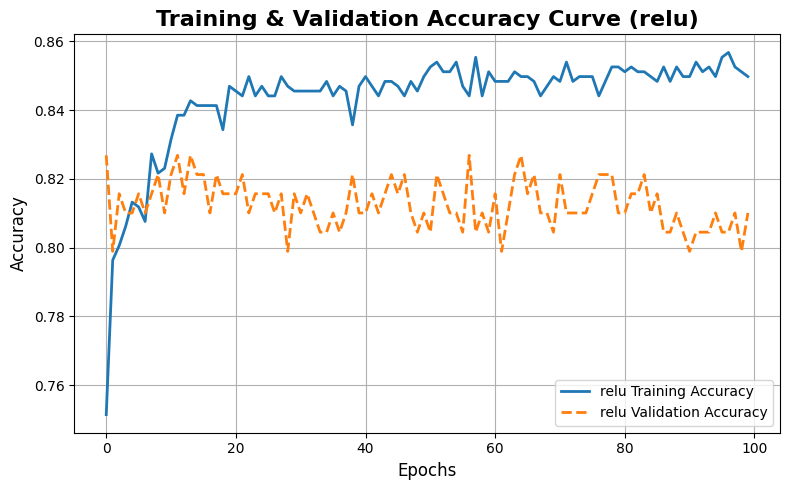

Final Test Accuracy with relu: 0.8101

Final Accuracy Comparison:
sigmoid: 0.7877
tanh: 0.7933
relu: 0.8101


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load Titanic dataset
def load_titanic_dataset():
    df = sns.load_dataset('titanic')
    # Drop rows with missing target data (Survived)
    df = df.dropna(subset=['survived'])

    # Select relevant features and the target
    X = df[['pclass', 'sex', 'age', 'fare', 'sibsp', 'parch', 'embarked']]
    y = df['survived']

    # Fill missing values for age and embarked
    X['age'].fillna(X['age'].mean(), inplace=True)
    X['embarked'].fillna(X['embarked'].mode()[0], inplace=True)

    # Convert categorical variables to dummy variables (one-hot encoding)
    X = pd.get_dummies(X, columns=['sex', 'embarked'], drop_first=True)

    return X.values, y.values

# Build a simple neural network with one hidden layer
def build_nn(activation_function):
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation=activation_function))  # 10 neurons in hidden layer
    model.add(Dense(1, activation='sigmoid'))  # 1 output neuron for binary classification
    model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate the model
def train_and_evaluate_model(activation_function, X_train, y_train, X_test, y_test):
    model = build_nn(activation_function)
    history = model.fit(X_train, y_train, epochs=100, verbose=0, validation_data=(X_test, y_test))  # Train the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)  # Evaluate the model
    return model, history, accuracy

# Plot the accuracy curve
def plot_accuracy_curve(history, activation_function):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['accuracy'], label=f'{activation_function} Training Accuracy', linewidth=2)
    plt.plot(history.history['val_accuracy'], label=f'{activation_function} Validation Accuracy', linestyle='--', linewidth=2)
    plt.title(f'Training & Validation Accuracy Curve ({activation_function})', fontsize=16, fontweight='bold')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Main block to execute the classification with different activation functions
if __name__ == "__main__":
    # Load and preprocess the Titanic dataset
    X, y = load_titanic_dataset()

    # Split the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Activation functions to compare
    activation_functions = ['sigmoid', 'tanh', 'relu']
    accuracies = {}

    for activation_function in activation_functions:
        print(f'\nTraining with {activation_function} activation function:')
        model, history, accuracy = train_and_evaluate_model(activation_function, X_train, y_train, X_test, y_test)
        accuracies[activation_function] = accuracy
        plot_accuracy_curve(history, activation_function)
        print(f'Final Test Accuracy with {activation_function}: {accuracy:.4f}')

    # Compare the final accuracies for each activation function
    print("\nFinal Accuracy Comparison:")
    for activation_function, accuracy in accuracies.items():
        print(f"{activation_function}: {accuracy:.4f}")


## INTERPRETATION

Sigmoid (78.77%): Performed adequately but faced challenges due to the vanishing gradient, especially in deeper layers.
Tanh (78.21%): While slightly underperforming in this scenario, it generally helps with zero-centered data but still suffers from some of the same issues as Sigmoid.
ReLU (81.01%): Achieved the best performance, demonstrating its strength in handling more complex problems, faster learning, and avoiding issues like the vanishing gradient. It is the most robust option in this scenario.

##Conclusion

ReLU consistently outperforms the other two activation functions for the Titanic classification task, offering a higher accuracy and faster convergence during training. This result is aligned with modern deep learning practices, where ReLU is preferred in most neural network architectures due to its simplicity and efficiency.